In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import brentq, minimize, minimize_scalar

plt.rcParams['font.family'] = 'SimHei' # 设置中文字体
plt.rcParams['axes.unicode_minus']=False # 坐标轴的负号正常显示
plt.rcParams['figure.constrained_layout.use'] = True # 自动约束布局

In [2]:
df = pd.read_excel('./keypoints(processed).xlsx', index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,736.2430,559.675000,0.650311,830.475000,515.602000,0.626633,836.309000,600.905000,0.620409,912.859000,...,0.745269,715.530000,539.065000,0.703324,736.2740,583.396000,0.082676,715.718000,486.126000,1.025990
1,735.2890,556.763333,0.607014,828.538667,512.640667,0.633446,835.353000,598.949667,0.622196,912.905667,...,0.743171,715.523667,535.203667,0.691652,736.2740,581.374667,0.086199,715.702667,483.253000,1.005325
2,735.1106,553.832200,0.611723,828.740000,509.718400,0.635577,834.620000,596.795400,0.608608,913.499800,...,0.764705,714.988200,532.628600,0.701352,734.5162,579.771200,0.091796,715.698200,481.458600,1.002985
3,735.1096,552.048600,0.618885,827.570000,507.343200,0.636191,834.060800,593.272800,0.600486,913.523400,...,0.768692,714.991400,530.276400,0.709588,733.3444,578.583600,0.089611,715.679800,479.692200,0.998129
4,735.6820,550.267200,0.641393,826.981800,504.974000,0.636807,833.485400,589.162800,0.594479,914.698600,...,0.769341,714.995600,527.920600,0.727896,733.3630,577.418200,0.084414,715.662800,477.901200,0.997555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,696.8670,401.985400,0.446838,806.959800,403.686200,0.680353,812.883200,480.314600,0.637495,889.977800,...,0.757025,682.178200,388.408000,0.530188,701.6126,456.792200,0.279560,692.203600,362.503600,0.795318
920,696.2680,399.044200,0.438130,806.950800,403.674400,0.680276,812.880000,480.309800,0.633689,891.136400,...,0.743786,681.007000,386.060600,0.521812,702.7744,457.345800,0.276559,692.205000,362.538000,0.796973
921,696.8594,402.571800,0.431666,806.951200,403.099200,0.675592,812.881600,480.311600,0.630882,892.306200,...,0.740047,682.154000,388.421200,0.514864,703.9450,457.914200,0.273283,692.195000,363.098800,0.805334
922,697.0540,406.703667,0.422011,806.940000,402.723333,0.668966,812.889333,480.310000,0.627553,893.283333,...,0.735929,682.337000,392.943000,0.501651,705.8900,458.666333,0.255979,692.173333,363.506333,0.836592


In [3]:
df_chain_rod_length = pd.read_excel('./各链杆相对长度.xlsx', header=None)

In [4]:
chain_rod_length = df_chain_rod_length.iloc[:,1].values

In [5]:
# 计算关节之间的2d距离
def cal_joints_lenths_2d(df, joints_id):
    joint0xy = df.loc[:,[joints_id[0]*3, joints_id[0]*3+1]]
    joint1xy = df.loc[:,[joints_id[1]*3, joints_id[1]*3+1]]
    lengths_2d = ((joint0xy.values - joint1xy.values)**2).sum(axis=1)**(1/2)
    return lengths_2d

In [6]:
joints_pair = [[0,1],
                [1,2],[1,5],
                [2,3],[5,6],
                [3,4],[6,7],
                [1,8],[1,11],
                [8,9],[11,12],
                [9,10],[12,13],]

In [7]:
ls = []
for i in range(len(joints_pair)):
    ls.append(cal_joints_lenths_2d(df, joints_pair[i]))
joints_length_arr = np.array(ls).T
joints_length_arr.shape

(924, 13)

In [20]:
s_max = (joints_length_arr / chain_rod_length)[:,0].max()

In [12]:
s = (joints_length_arr/ chain_rod_length).max(axis=1)

In [116]:
dZ_unsigned = pd.DataFrame(np.around((chain_rod_length**2 - ((joints_length_arr**2).T / (s**2)).T),10)**(1/2))
dZ_unsigned

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,58.487204,0.000000,21.554935,76.460468,68.127945,93.609627,58.696800,162.048262,194.329154,51.599683,13.868205,66.161935,74.101055
1,61.232639,-0.000000,28.014798,76.699189,68.716846,93.421113,59.822904,153.647744,166.963279,57.747581,74.527064,83.758265,79.591317
2,61.823775,-0.000000,30.767321,78.751931,70.744043,94.475957,62.971674,155.256083,174.997536,61.758035,73.252939,89.091322,79.638455
3,61.208275,0.000000,30.136771,77.114851,67.135772,92.481347,62.154210,144.970556,165.347471,55.810367,73.007878,92.491528,75.930453
4,59.568692,0.000000,27.342149,73.269201,62.383252,90.794580,58.731979,132.169768,159.718759,48.869907,63.243692,88.440112,67.506753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,42.083207,26.639699,22.133032,67.341650,61.911623,105.720037,69.703702,166.455918,198.464493,60.090669,0.000000,76.063722,71.331432
920,37.377568,24.207374,17.535973,63.808546,59.490037,104.945286,68.769437,160.674622,189.168437,49.123428,0.000000,73.542566,69.810745
921,29.091992,13.386351,0.000000,55.210843,52.283673,102.239139,63.937356,142.886906,163.585713,26.940650,6.809913,63.695720,63.552406
922,31.373721,13.577029,0.000000,55.320838,53.955075,101.133821,65.472119,142.747160,157.892045,19.497420,30.537248,72.525536,70.381718


In [130]:
dZ_sign = pd.read_excel('dZ方向.xlsx')

In [131]:
dZ = pd.DataFrame(dZ_unsigned.values * dZ_sign.values)

In [132]:
dZ

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,58.487204,0.000000,21.554935,76.460468,-68.127945,93.609627,58.696800,-162.048262,-194.329154,51.599683,13.868205,-66.161935,-74.101055
1,61.232639,-0.000000,28.014798,76.699189,-68.716846,93.421113,59.822904,-153.647744,-166.963279,57.747581,74.527064,-83.758265,-79.591317
2,61.823775,-0.000000,30.767321,78.751931,-70.744043,94.475957,62.971674,-155.256083,-174.997536,61.758035,73.252939,-89.091322,-79.638455
3,61.208275,0.000000,30.136771,77.114851,-67.135772,92.481347,62.154210,-144.970556,-165.347471,55.810367,73.007878,-92.491528,-75.930453
4,59.568692,0.000000,27.342149,73.269201,-62.383252,90.794580,58.731979,-132.169768,-159.718759,48.869907,63.243692,-88.440112,-67.506753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,42.083207,26.639699,22.133032,67.341650,-61.911623,105.720037,69.703702,-166.455918,-198.464493,60.090669,0.000000,-76.063722,-71.331432
920,37.377568,24.207374,17.535973,63.808546,-59.490037,104.945286,68.769437,-160.674622,-189.168437,49.123428,0.000000,-73.542566,-69.810745
921,29.091992,13.386351,0.000000,55.210843,-52.283673,102.239139,63.937356,-142.886906,-163.585713,26.940650,6.809913,-63.695720,-63.552406
922,31.373721,13.577029,0.000000,55.320838,-53.955075,101.133821,65.472119,-142.747160,-157.892045,19.497420,30.537248,-72.525536,-70.381718


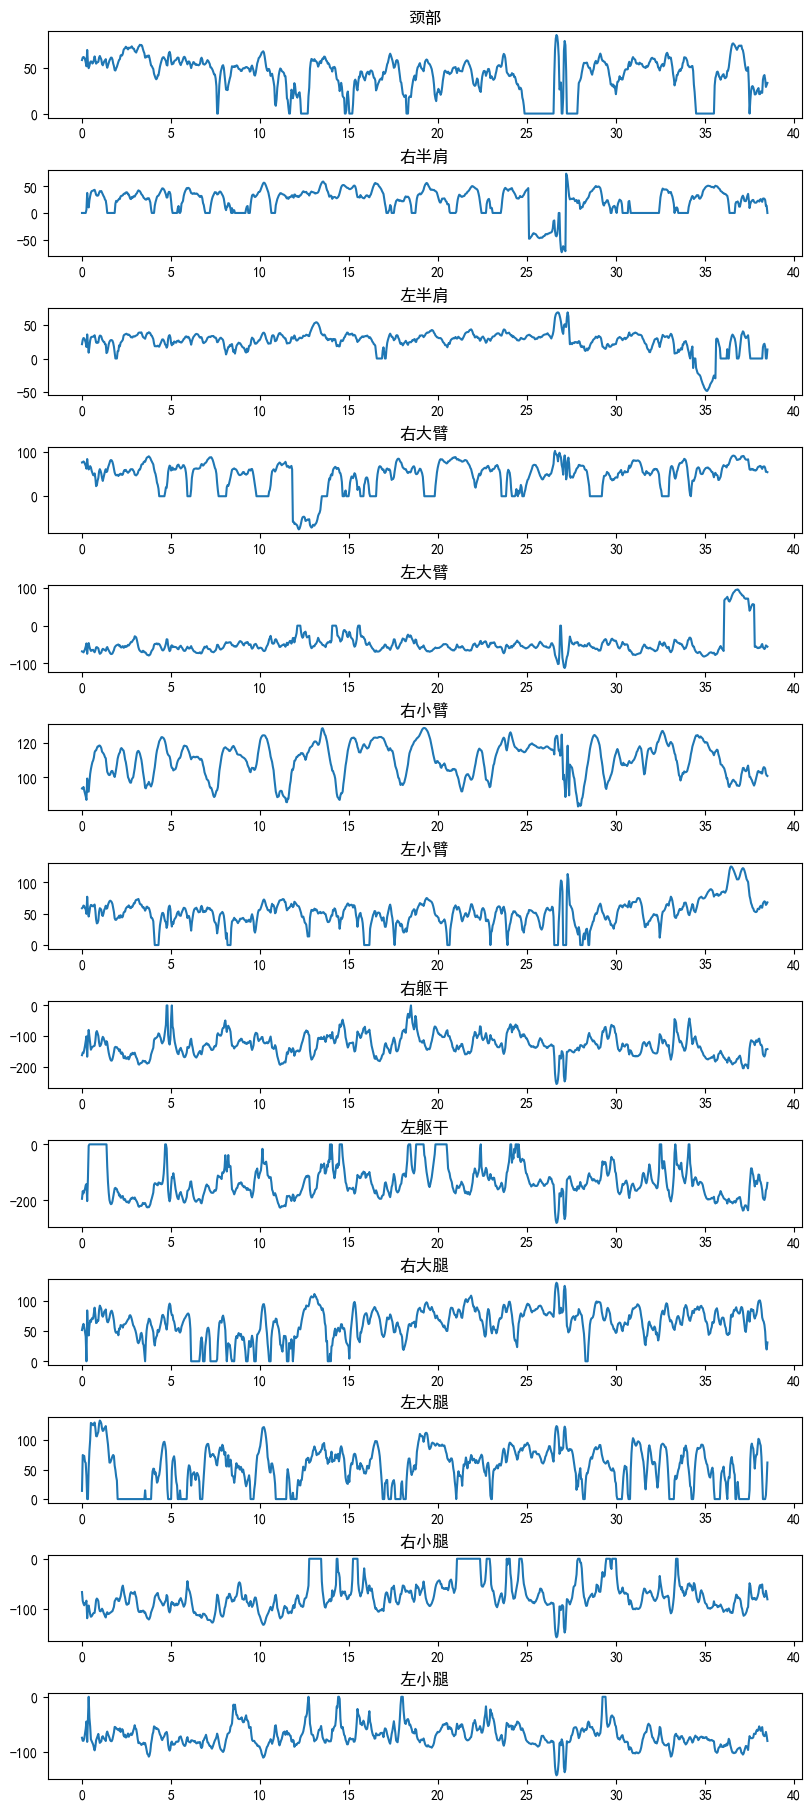

In [133]:
fig, axes = plt.subplots(13,1, figsize=(8,18))
chain_rod_columns = ['颈部','右半肩','左半肩','右大臂','左大臂','右小臂','左小臂','右躯干','左躯干','右大腿','左大腿','右小腿','左小腿']
for i in range(13):
    axes[i].set_title(chain_rod_columns[i])
    axes[i%13].plot(np.linspace(0,38.5,924),dZ.iloc[:,i])
plt.show()

In [134]:
s_for_neck = (joints_length_arr/ chain_rod_length)[:,[1,2]].mean(axis=1)

In [135]:
Z0 = 1 / s_for_neck

In [136]:
Z0

array([0.8837042 , 0.88897995, 0.89050284, 0.89977302, 0.9094852 ,
       0.91954621, 0.92930396, 0.92495324, 0.92209607, 0.92243262,
       0.92951247, 0.94382637, 0.96620417, 0.9852718 , 0.99287158,
       0.99685237, 0.99350336, 0.98889763, 0.98125678, 0.97737005,
       0.97332996, 0.96937959, 0.96650284, 0.96672395, 0.97040802,
       0.97794324, 0.98543395, 0.98524345, 0.97335162, 0.95063072,
       0.92909774, 0.90509536, 0.88869404, 0.88532957, 0.88256969,
       0.87018669, 0.86463475, 0.85576064, 0.84429824, 0.83586047,
       0.83601065, 0.84452335, 0.85911469, 0.87106278, 0.88960165,
       0.9055792 , 0.91529227, 0.9117386 , 0.9180042 , 0.92049131,
       0.92652033, 0.92858378, 0.93811804, 0.94538259, 0.95651666,
       0.96206586, 0.97067015, 0.97485553, 0.97954813, 0.97831155,
       0.97929659, 0.97234896, 0.96060699, 0.95073388, 0.94046791,
       0.93381084, 0.93201565, 0.94153753, 0.94415202, 0.9588356 ,
       0.96055667, 0.96527746, 0.97080228, 0.97681799, 0.97517

In [167]:
Z_add_path = {'0':(0,),
        '2':(1,),
        '3':(1,3),
        '4':(1,3,5),
        '5':(2,),
        '6':(2,4),
        '7':(2,4,6),
        '8':(7,),
        '9':(7,9),
        '10':(7,9,11),
        '11':(8,),
        '12':(8,10),
        '13':(8,10,12),
        }

In [140]:
Z = np.zeros((924,14))
Z[:,1] = Z0

In [168]:
for key in Z_add_path:
    Z[:,int(key)] = dZ.iloc[:,list(Z_add_path[key])].sum(axis=1)

In [169]:
Z

array([[  58.48720407,    0.8837042 ,    0.        , ..., -194.32915388,
        -180.46094914, -254.56200405],
       [  61.23263878,    0.88897995,    0.        , ..., -166.96327911,
         -92.43621521, -172.0275327 ],
       [  61.823775  ,    0.89050284,    0.        , ..., -174.99753592,
        -101.74459652, -181.38305198],
       ...,
       [  29.09199192,    0.94358728,   13.38635122, ..., -163.58571331,
        -156.77580037, -220.32820589],
       [  31.37372085,    0.93881271,   13.57702894, ..., -157.89204473,
        -127.35479649, -197.73651404],
       [  33.47034197,    0.93363055,    0.        , ..., -137.60057313,
         -75.7767838 , -155.73556833]])

In [183]:
X = ((df.iloc[:,[3*i for i in range(14)]].T / s).T).values
Y = ((df.iloc[:,[3*i+1 for i in range(14)]].T / s).T).values

In [ ]:
df.iloc[:,[3*i for i in range(14)]]

,0,3,6,9,12,15,18,21,24,27,30,33,36,39
0,736.2430,830.475000,836.309000,912.859000,836.478000,830.4070,948.199000,1080.700000,1127.760000,1295.520000,1492.710000,1139.520000,1304.360000,1472.050000
1,735.2890,828.538667,835.353000,912.905667,834.474333,830.4810,949.132667,1082.630000,1135.613333,1302.416667,1492.756667,1161.110000,1306.326667,1473.080000
2,735.1106,828.740000,834.620000,913.499800,832.864200,831.0532,949.315400,1081.852000,1137.180000,1303.184000,1491.550000,1158.366000,1305.536000,1474.454000
3,735.1096,827.570000,834.060800,913.523400,830.500600,830.4716,949.886400,1081.258000,1138.946000,1305.552000,1489.202000,1159.544000,1304.930000,1474.484000
4,735.6820,826.981800,833.485400,914.698600,829.305400,829.8648,949.896800,1080.658000,1139.534000,1305.536000,1488.028000,1156.012000,1303.764000,1475.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,696.8670,806.959800,812.883200,889.977800,846.398000,806.9148,926.382600,1046.470000,1089.482000,1244.306000,1429.762000,1102.466000,1260.820000,1426.244000
920,696.2680,806.950800,812.880000,891.136400,846.402800,806.9122,926.392600,1045.890000,1090.062000,1247.240000,1431.504000,1105.988000,1261.988000,1426.248000
921,696.8594,806.951200,812.881600,892.306200,845.241200,806.9156,926.391400,1045.322000,1091.824000,1249.570000,1432.092000,1113.040000,1263.744000,1425.688000
922,697.0540,806.940000,812.889333,893.283333,843.307667,806.9030,926.604333,1045.283333,1093.390000,1253.280000,1432.856667,1117.943333,1266.113333,1426.066667


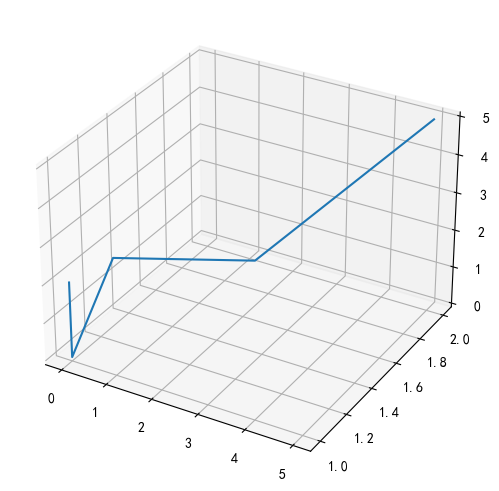

In [137]:
plt.subplot(projection='3d')
x = [0, 0, 1, 4, 5]
y = [1, 1, 1, 1, 2]
z = [2, 0, 3, 4, 5]
plt.plot(x,y,z)
plt.show()

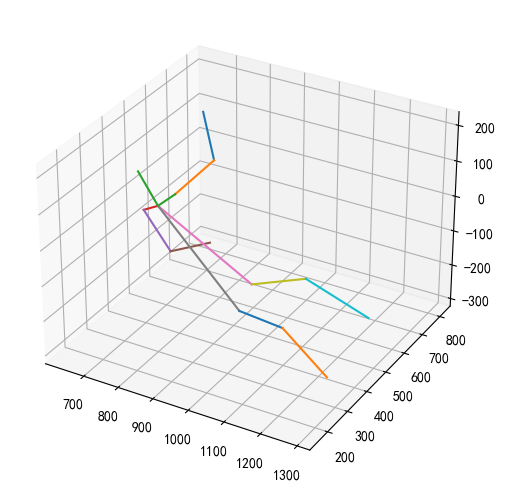

In [192]:
def line_plot(i,X,Y,Z, joints):
    plt.plot([X[i,joints[0]], X[i,joints[1]]], [Y[i,joints[0]], Y[i,joints[1]]], [Z[i,joints[0]], Z[i,joints[1]]])
def skeleton(i,X,Y,Z):
    plt.subplot(projection='3d')
    line_plot(i,X,Y,Z, [4,3])
    line_plot(i,X,Y,Z, [3,2])
    line_plot(i,X,Y,Z, [2,1])
    line_plot(i,X,Y,Z, [1,5])
    line_plot(i,X,Y,Z, [5,6])
    line_plot(i,X,Y,Z, [6,7])
    line_plot(i,X,Y,Z, [1,8])
    line_plot(i,X,Y,Z, [1,11])
    line_plot(i,X,Y,Z, [8,9])
    line_plot(i,X,Y,Z, [9,10])
    line_plot(i,X,Y,Z, [11,12])
    line_plot(i,X,Y,Z, [12,13])
    line_plot(i,X,Y,Z, [0,1])
    # plt.xlim((0,1920))
    # plt.ylim((0,1080))
    ax = plt.gca()
    ax.set_aspect('equal')        
    plt.show()

skeleton(0,X,Y,Z)

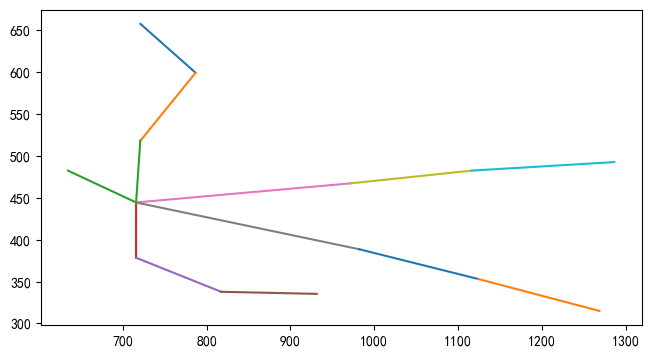

In [190]:
def line_plot_xy(i,X,Y, joints):
    plt.plot([X[i,joints[0]], X[i,joints[1]]], [Y[i,joints[0]], Y[i,joints[1]]])
def skeleton_xy(i,X,Y):
    line_plot_xy(i,X,Y, [4,3])
    line_plot_xy(i,X,Y, [3,2])
    line_plot_xy(i,X,Y, [2,1])
    line_plot_xy(i,X,Y, [1,5])
    line_plot_xy(i,X,Y, [5,6])
    line_plot_xy(i,X,Y, [6,7])
    line_plot_xy(i,X,Y, [1,8])
    line_plot_xy(i,X,Y, [1,11])
    line_plot_xy(i,X,Y, [8,9])
    line_plot_xy(i,X,Y, [9,10])
    line_plot_xy(i,X,Y, [11,12])
    line_plot_xy(i,X,Y, [12,13])
    line_plot_xy(i,X,Y, [0,1])
    # plt.xlim((0,1920))
    # plt.ylim((0,1080))
    ax = plt.gca()
    ax.set_aspect('equal')        
    plt.show()

skeleton_xy(0,X,Y)